# 1. Predict User Engagement

Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 331389009920.0000 - val_loss: 570785726464.0000
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 295365771264.0000 - val_loss: 570237845504.0000
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 343583358976.0000 - val_loss: 568363384832.0000
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 299632525312.0000 - val_loss: 565408825344.0000
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 260228792320.0000 - val_loss: 561355489280.0000
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 249784909824.0000 - val_loss: 555953618944.0000
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 294844563456.0000 - val_loss: 547752640512.0000
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 249222807552.0000 - val_loss: 539529314304.0000
Epoch 9/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 322585493504.0000 - val_loss: 528442032128.0000
Epoch 10/100
185/18

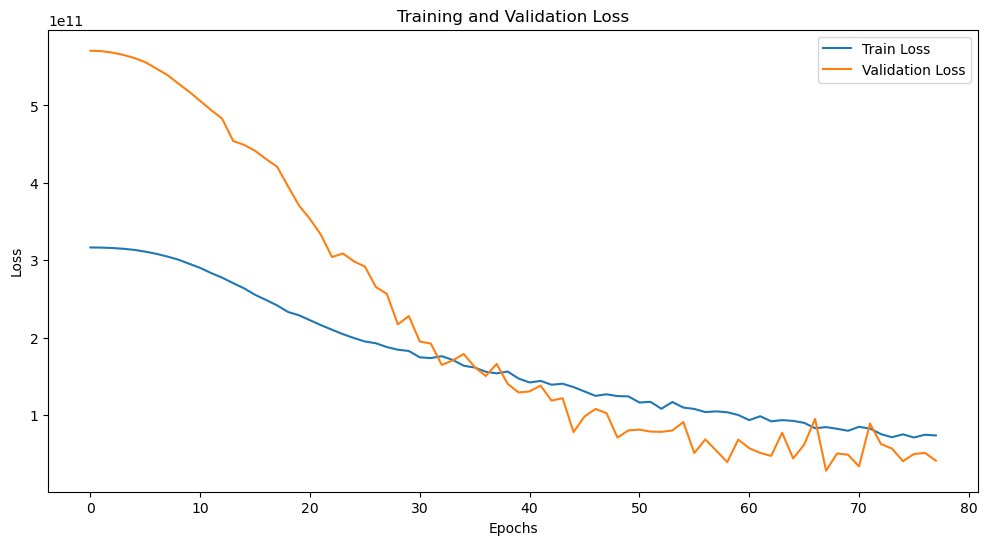

Mô hình dự đoán sự tham gia của người dùng đã được lưu.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Read data
data = pd.read_csv('libraries_cleaned.csv')

# Preprocess data
# Remove rows with null values
data.dropna(inplace=True)

# Select features and labels
X = data[['service_population', 'total_staff', 'print_collection', 'digital_collection']]
y = data['library_visits']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the model with Batch Normalization
model_visits = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    layers.BatchNormalization(),  # Add Batch Normalization
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),  # Add Batch Normalization
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile the model with AdamW
model_visits.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Set EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_library_visits.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model_visits.fit(X_train, y_train, epochs=100, validation_split=0.2, 
                            callbacks=[early_stopping, model_checkpoint])

# Evaluate the model on the test set
y_pred = model_visits.predict(X_test)
test_loss = model_visits.evaluate(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the best model
model_visits.save('model_library_visits_final.keras')


# 2. User Behavior Analysis

Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6867367936.0000 - val_loss: 9360393216.0000
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5788275712.0000 - val_loss: 9312736256.0000
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5015218176.0000 - val_loss: 9171166208.0000
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5056214528.0000 - val_loss: 8933639168.0000
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6111074816.0000 - val_loss: 8579550208.0000
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6501625344.0000 - val_loss: 8099854848.0000
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4265583360.0000 - val_loss: 7476853760.0000
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5182603264.0000 - val_loss: 7014201856.0000
Epoch 9/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5415286272.0000 - val_loss: 6598639616.0000
Epoch 10/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

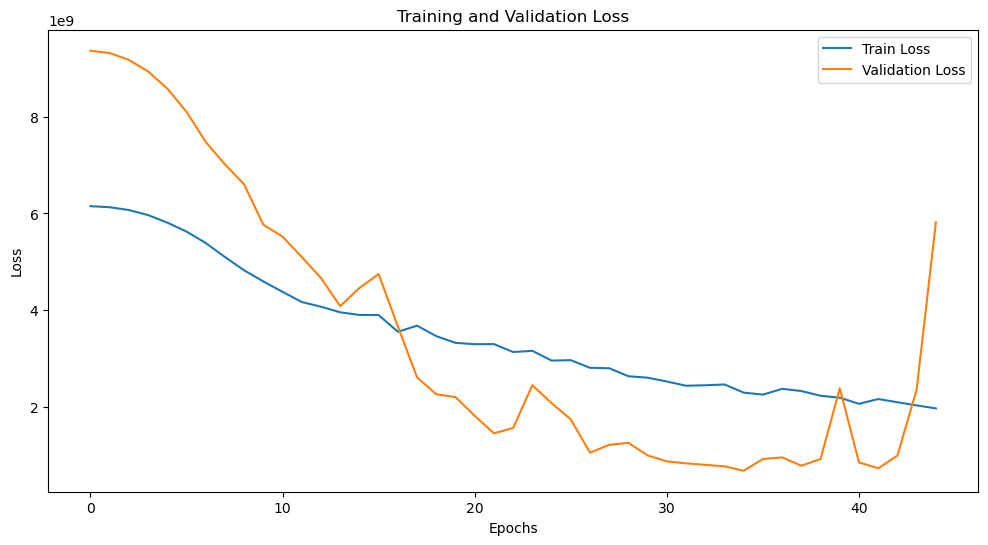

Mô hình phân tích hành vi người dùng đã được lưu.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Read data
data = pd.read_csv('libraries_cleaned.csv')

# Preprocess data
# Check for missing values
data.dropna(inplace=True)

# Select features and labels
X_user_analysis = data[['service_population', 'total_staff', 'library_visits']]
y_user_analysis = data['registered_users'] # Number of registered users

# Standardize the data
scaler = StandardScaler()
X_user_analysis_scaled = scaler.fit_transform(X_user_analysis)

# Split the data into training and testing sets
X_train_user, X_test_user, y_train_user, y_test_user = train_test_split(
    X_user_analysis_scaled, y_user_analysis, test_size=0.2, random_state=42
)

# Build the model with Batch Normalization and Dropout
model_user_analysis = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_user.shape[1]]),
    layers.BatchNormalization(),
    layers.Dropout(0.2),  # Add Dropout to reduce overfitting
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile the model with Adam
model_user_analysis.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Set EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_user_analysis.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model_user_analysis.fit(
    X_train_user, y_train_user, 
    epochs=100, 
    validation_split=0.2, 
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model on the test set
y_pred_user = model_user_analysis.predict(X_test_user)
test_loss = model_user_analysis.evaluate(X_test_user, y_test_user)
mae = mean_absolute_error(y_test_user, y_pred_user)
r2 = r2_score(y_test_user, y_pred_user)

print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the best model
model_user_analysis.save('model_user_analysis_final.keras')

# 3. Library Classification

Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7260 - loss: 0.6818 - val_accuracy: 0.7454 - val_loss: 0.5979
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8964 - loss: 0.2693 - val_accuracy: 0.8138 - val_loss: 0.3523
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9142 - loss: 0.2020 - val_accuracy: 0.9106 - val_loss: 0.1918
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9282 - loss: 0.1714 - val_accuracy: 0.9580 - val_loss: 0.1042
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9402 - loss: 0.1486 - val_accuracy: 0.9614 - val_loss: 0.0940
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9352 - loss: 0.1590 - val_accuracy: 0.9621 - val_loss: 0.1036
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9469 - loss: 0.1308 - val_accuracy: 0.9817 - val_loss: 0.0726
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9505 - loss: 0.1291 - val_accu

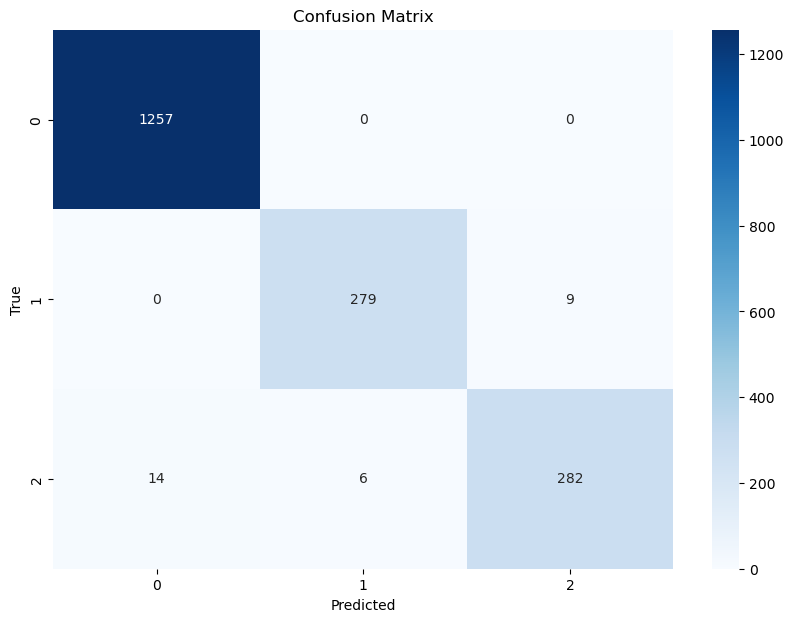

Mô hình phân loại thư viện đã được lưu.


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read data
data = pd.read_csv('libraries_cleaned.csv')

# Data preprocessing
# Check for missing values
data.dropna(inplace=True)

# Select features and labels
X_classification = data[['service_population', 'total_staff', 'print_collection', 'digital_collection']]
y_classification = pd.factorize(data['library_size'])[0]

# Standardize data
scaler = StandardScaler()
X_classification_scaled = scaler.fit_transform(X_classification)

# Split data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_classification_scaled, y_classification, test_size=0.2, random_state=42
)

# Build the model with Batch Normalization and Dropout
model_classification = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_class.shape[1]]),
    layers.BatchNormalization(),
    layers.Dropout(0.3),  # Add Dropout to reduce overfitting
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(len(np.unique(y_classification)), activation='softmax')
])

# Compile the model
model_classification.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_library_classification.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model_classification.fit(
    X_train_class, y_train_class,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model on the test set
y_pred_class = model_classification.predict(X_test_class)
y_pred_class_labels = np.argmax(y_pred_class, axis=1)

# Print classification report
print(classification_report(y_test_class, y_pred_class_labels))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_classification), yticklabels=np.unique(y_classification))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Save the best model
model_classification.save('model_library_classification_final.keras')

# 4. Resource Optimization

Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3280.6597 - val_loss: 5080.7173
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1702.7812 - val_loss: 3162.0630
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1229.1656 - val_loss: 1665.8871
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 720.9363 - val_loss: 470.8516
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1827.1914 - val_loss: 1020.2849
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 757.1417 - val_loss: 1182.8042
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 828.7166 - val_loss: 3366.6736
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 641.7133 - val_loss: 2615.0769
Epoch 9/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1140.8521 - val_loss: 1890.1820
Epoch 10/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 556.4315 - val_loss: 2541.6887
Epoch 11/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 766.3852 - va

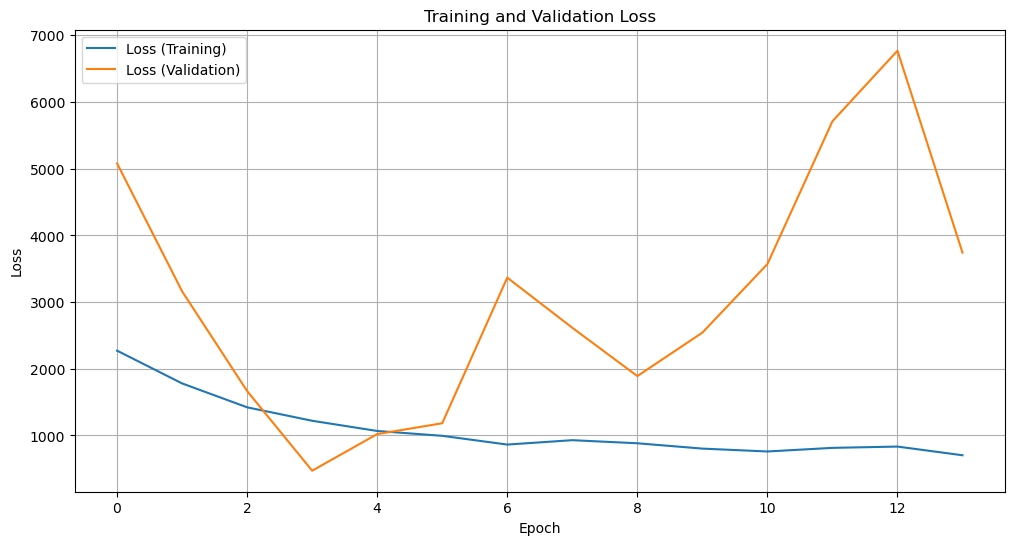

Mô hình tối ưu hóa tài nguyên đã được lưu.


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Read data
data = pd.read_csv('libraries_cleaned.csv')

# Data preprocessing
# Check and remove rows with null values
data.dropna(inplace=True)

# Select features and labels
X_optimization = data[['service_population', 'print_collection', 'digital_collection']]
y_optimization = data['total_staff']

# Standardize data
scaler = StandardScaler()
X_optimization_scaled = scaler.fit_transform(X_optimization)

# Split data into training and testing sets
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(
    X_optimization_scaled, y_optimization, test_size=0.2, random_state=42
)

# Build the model with Batch Normalization and Dropout
model_optimization = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_opt.shape[1]]),
    layers.BatchNormalization(),
    layers.Dropout(0.3),  # Add Dropout to reduce overfitting
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1)
])

# Compile the model
model_optimization.compile(optimizer='adam', loss='mse')

# Set EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_resource_optimization.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model_optimization.fit(
    X_train_opt, y_train_opt,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model on the test set
loss = model_optimization.evaluate(X_test_opt, y_test_opt)
print(f'Model Loss: {loss}')

# Plot loss during training
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss (Training)')
plt.plot(history.history['val_loss'], label='Loss (Validation)')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Save the best model
model_optimization.save('model_resource_optimization_final.keras')

# 5. Book recommendations

Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1084049719296.0000 - val_loss: 1328629809152.0000
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1078415982592.0000 - val_loss: 1328006168576.0000
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1201143808000.0000 - val_loss: 1326348369920.0000
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1128165801984.0000 - val_loss: 1323630985216.0000
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1026472280064.0000 - val_loss: 1318848430080.0000
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1263536832512.0000 - val_loss: 1312413712384.0000
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1057879949312.0000 - val_loss: 1305930104832.0000
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1044754726912.0000 - val_loss: 1299469565952.0000
Epoch 9/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1092113661952.0000 - val_loss: 1284534697984.0000
E

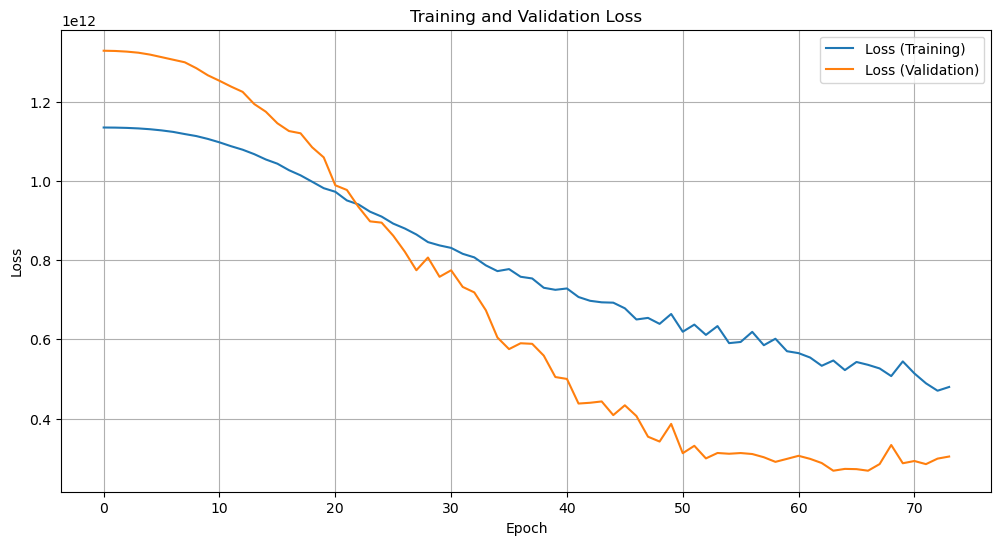

Mô hình gợi ý sách đã được lưu.


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Read data
data = pd.read_csv('libraries_cleaned.csv')

# Data preprocessing
# Check and remove rows with null values
data.dropna(inplace=True)

# Select features and labels
X_suggestion = data[['print_collection', 'digital_collection', 'registered_users']]
y_suggestion = data['circulation_transactions']

# Standardize data
scaler = StandardScaler()
X_suggestion_scaled = scaler.fit_transform(X_suggestion)

# Split data into training and testing sets
X_train_sug, X_test_sug, y_train_sug, y_test_sug = train_test_split(
    X_suggestion_scaled, y_suggestion, test_size=0.2, random_state=42
)

# Building a recommendation model with neural networks
model_suggestion = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_sug.shape[1]]),
    layers.BatchNormalization(),
    layers.Dropout(0.3),  # Add Dropout to reduce overfitting
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Unique output for the number of borrowed books
])

# Compile the model
model_suggestion.compile(optimizer='adam', loss='mse')

# Set EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_book_suggestion.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model_suggestion.fit(
    X_train_sug, y_train_sug,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model on the test set
loss = model_suggestion.evaluate(X_test_sug, y_test_sug)
print(f'Model Loss: {loss}')

# Plot loss during training
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss (Training)')
plt.plot(history.history['val_loss'], label='Loss (Validation)')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Save the best model
model_suggestion.save('model_book_suggestion_final.keras')

# 6. Predicting Usage Trends

Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 275924975616.0000 - val_loss: 570790969344.0000
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 277090205696.0000 - val_loss: 570174472192.0000
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 294538903552.0000 - val_loss: 568327798784.0000
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 287103221760.0000 - val_loss: 564741931008.0000
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 332209356800.0000 - val_loss: 560258220032.0000
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 281819381760.0000 - val_loss: 555625349120.0000
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 318409932800.0000 - val_loss: 547618291712.0000
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 329206628352.0000 - val_loss: 538827685888.0000
Epoch 9/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 270515765248.0000 - val_loss: 525388283904.0000
Epoch 10/100
185/18

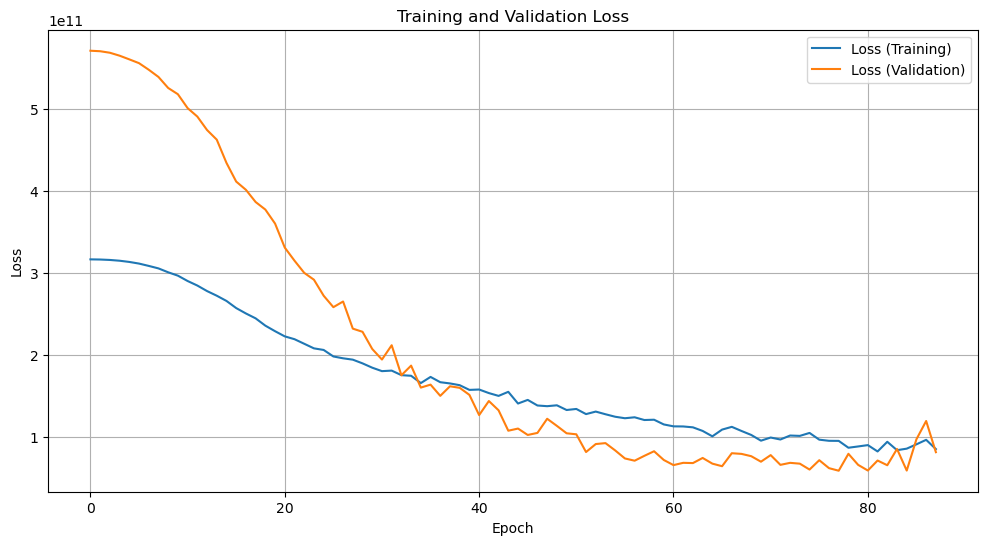

Mô hình dự đoán xu hướng sử dụng đã được lưu.


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Read data
data = pd.read_csv('libraries_cleaned.csv')

# Data preprocessing
# Check and remove rows with null values
data.dropna(inplace=True)

# Select features and labels
X_trend = data[['print_collection', 'digital_collection']]
y_trend = data['library_visits']

# Standardize data
scaler = StandardScaler()
X_trend_scaled = scaler.fit_transform(X_trend)

# Split data into training and testing sets
X_train_trend, X_test_trend, y_train_trend, y_test_trend = train_test_split(
    X_trend_scaled, y_trend, test_size=0.2, random_state=42
)

# Build the model
model_trend = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_trend.shape[1]]),
    layers.BatchNormalization(),
    layers.Dropout(0.3),  # Add Dropout to reduce overfitting
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Unique output for the number of borrowed books
])

# Compile the model
model_trend.compile(optimizer='adam', loss='mse')

# Set EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_usage_trend.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model_trend.fit(
    X_train_trend, y_train_trend,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model on the test set
loss = model_trend.evaluate(X_test_trend, y_test_trend)
print(f'Model Loss: {loss}')

# Plot loss during training
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss (Training)')
plt.plot(history.history['val_loss'], label='Loss (Validation)')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Save the best model
model_trend.save('model_usage_trend_final.keras')

# 7. Anomaly Detection

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.3631 - val_loss: 1.5146
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1149 - val_loss: 1.2159
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1209 - val_loss: 0.9815
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1967 - val_loss: 0.8888
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0990 - val_loss: 0.8344
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0628 - val_loss: 0.7951
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1627 - val_loss: 0.7683
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9988 - val_loss: 0.7478
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1402 - val_loss: 0.7340
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0665 - val_loss: 0.7223
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6529 - val_loss: 0.7130
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.

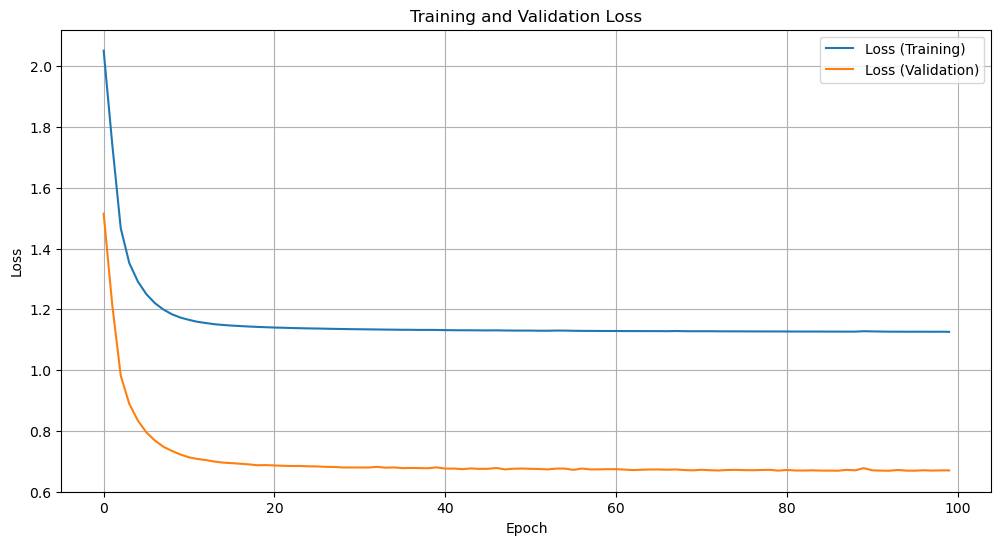

Mô hình phát hiện bất thường đã được lưu.


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Read data
data = pd.read_csv('libraries_cleaned.csv')

# Data preprocessing
# Check and remove rows with null values
data.dropna(inplace=True)

# Select features to train Autoencoder
X = data[['print_collection', 'digital_collection', 'library_visits']]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)  # Keep 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Build an Autoencoder
input_layer = layers.Input(shape=(X_pca.shape[1],))
encoded = layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))(input_layer)
encoded = layers.Dropout(0.2)(encoded)  # Add Dropout to reduce overfitting
encoded = layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(X_pca.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Set EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_anomaly_detection.keras', save_best_only=True, monitor='loss')

# Train the Autoencoder
history = autoencoder.fit(
    X_pca, X_pca,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model
loss = autoencoder.evaluate(X_pca, X_pca)
print(f'Model Loss: {loss}')

# Plot loss during training
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss (Training)')
plt.plot(history.history['val_loss'], label='Loss (Validation)')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Save the best model
autoencoder.save('model_anomaly_detection_final.keras')

# 8. Building a Real-Time Model

Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - loss: 5781909504.0000 - val_loss: 7667590656.0000
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 4643857920.0000 - val_loss: 7661943296.0000
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 4816364032.0000 - val_loss: 7537526272.0000
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 4932635136.0000 - val_loss: 7652476416.0000
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 4721157632.0000 - val_loss: 7475409920.0000
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 6190846464.0000 - val_loss: 7442750464.0000
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 4101853184.0000 - val_loss: 7639339008.0000
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 3866515968.0000 - val_loss: 7343088128.0000
Epoch 9/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 3827731200.0000 - val_loss: 7402763264.0000
Epoch 10/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 

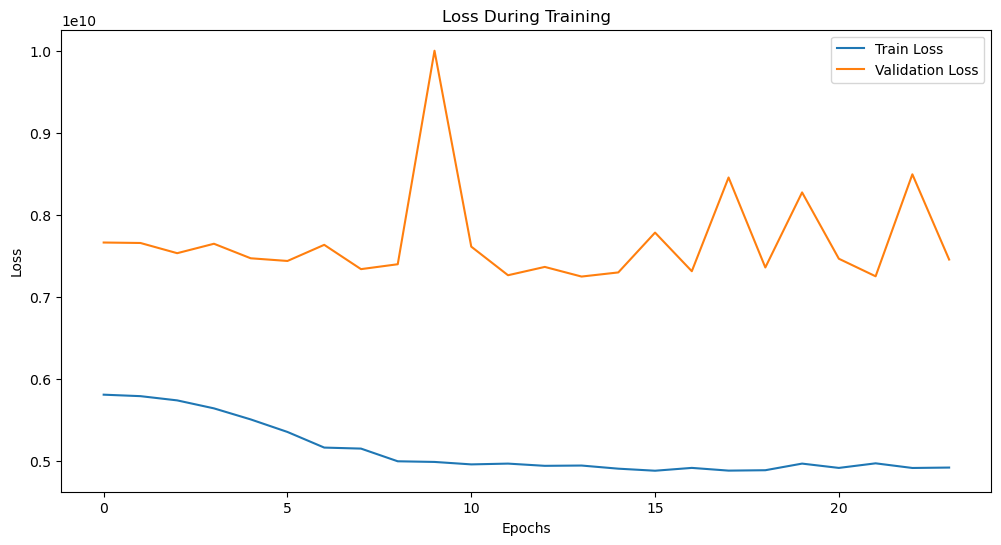

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')

# Read data
data = pd.read_csv('libraries_cleaned.csv')

# Tiền xử lý dữ liệu: chọn các đặc điểm
features = ['print_collection', 'digital_collection', 'library_visits']
target = 'registered_users'  # Ví dụ: Dự đoán số lượng người dùng đã đăng ký

# Standardize data
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

# Create dataset
X = data[features].values
y = data[target].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Convert data to datetime format
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step), :])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

time_step = 10  # Number of time steps
X_train_lstm, y_train_lstm = create_dataset(X_train, y_train, time_step)
X_test_lstm, y_test_lstm = create_dataset(X_test, y_test, time_step)

# Build the model LSTM
model_lstm = Sequential()
model_lstm.add(Bidirectional(LSTM(100, activation='relu', return_sequences=True), input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(BatchNormalization())
model_lstm.add(Dropout(0.2))  # Add Dropout
model_lstm.add(Bidirectional(LSTM(50, activation='relu')))
model_lstm.add(BatchNormalization())
model_lstm.add(Dropout(0.2))  # Add Dropout
model_lstm.add(Dense(50, activation='relu'))  # Add Dense
model_lstm.add(Dense(1))  # Output

# Compile the model
model_lstm.compile(optimizer='adam', loss='mse')

# Set EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_real_time.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model_lstm.fit(X_train_lstm, y_train_lstm, 
                          epochs=100, 
                          batch_size=32, 
                          validation_split=0.2,
                          callbacks=[early_stopping, model_checkpoint])

# Save the best model
model_lstm.save('model_real_time_final.keras')

# Plot loss during training
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# 9. Enhancing Customer Experience

Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5352 - val_loss: 0.0297
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0944 - val_loss: 0.0333
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0497 - val_loss: 0.0312
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0313 - val_loss: 0.0059
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0214 - val_loss: 0.0084
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0137 - val_loss: 0.0049
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0094 - val_loss: 0.0043
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0076 - val_loss: 0.0044
Epoch 9/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0063 - val_loss: 0.0025
Epoch 10/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0046 - val_loss: 0.0014
Epoch 11/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0053 - val_loss: 0.0012
Epoch 12/100
185/185 ━━━━━━━━━━━━━━━━━━━━

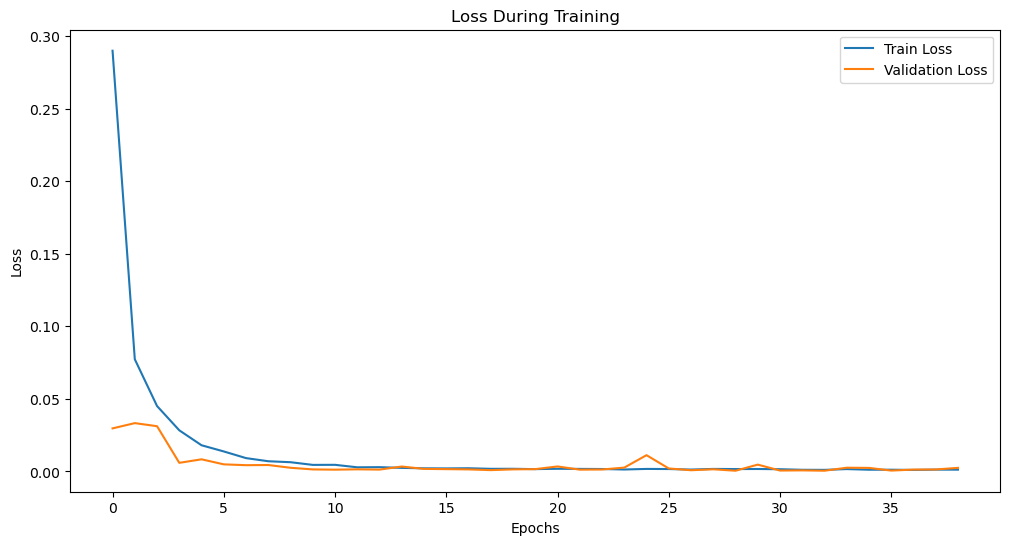

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')

# Assuming that the data has been defined and pre-processed
X_satisfaction = data[['service_population', 'total_staff', 'library_visits']]
y_satisfaction = data['library_visits']  # This seems to be a mistake; you may need to change it to predict a different metric, such as satisfaction

# Split data into training and testing sets
X_train_satisfaction, X_test_satisfaction, y_train_satisfaction, y_test_satisfaction = train_test_split(
    X_satisfaction, y_satisfaction, test_size=0.2, random_state=42
)

# Build the model
model_satisfaction = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_satisfaction.shape[1]]),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Đầu ra
])

# Compile the model
model_satisfaction.compile(optimizer='adam', loss='mse')

# Set EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_customer_satisfaction.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model_satisfaction.fit(
    X_train_satisfaction, 
    y_train_satisfaction, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
)

# Save the model
model_satisfaction.save('model_customer_satisfaction_final.keras')

# Plot loss during training
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
